<a href="https://colab.research.google.com/github/rlawogjs96/text_mining/blob/main/Code7_word_embedding(word2vec).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 영어 데이터 활용한 Word2vec 만들기

In [ ]:
import re
import urllib.request
import zipfile
from lxml import etree
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

### 데이터 불러오기

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f443f7dae10>)

In [ ]:
# xml 문법의 데이터 -> 전처리 필요
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

parse_text = '\n'.join(target_text.xpath('//content/text()'))
content_text = re.sub(r'\([^)]*\)', '', parse_text)
sent_text = sent_tokenize(content_text)

# 불용어 사전
from nltk.corpus import stopwords
stop_word_list = stopwords.words('english')
result = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    tokenized = word_tokenize(tokens)
    tokenized_stop = []
    for anword in tokenized:
        if not anword in stop_word_list:
            tokenized_stop.append(anword)
    result.append(tokenized_stop)

In [ ]:
print('총 데이터의 개수 : {}'.format(len(result)))

총 데이터의 개수 : 273424


In [ ]:
for line in result[:3]:
    print(line)

['two', 'reasons', 'companies', 'fail', 'new']
['real', 'real', 'solution', 'quality', 'growth', 'figuring', 'balance', 'two', 'activities', 'exploration', 'exploitation']
['necessary', 'much', 'good', 'thing']


### Word2vec 모델 훈련시키기

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [ ]:
model = Word2Vec(sentences =result , size = 100, window = 5, min_count= 5, workers = 4, sg = 0)

size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.

window = 컨텍스트 윈도우 크기

min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)

workers = 학습을 위한 프로세스 수

sg = 0은 CBOW, 1은 Skip-gram.

In [ ]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.9107158780097961), ('girl', 0.823065459728241), ('daughter', 0.8190310001373291), ('father', 0.8078629374504089), ('boy', 0.7982612252235413), ('lady', 0.7915226221084595), ('son', 0.7855687141418457), ('uncle', 0.7755171656608582), ('brother', 0.7696157693862915), ('grandfather', 0.7679935693740845)]


In [ ]:
# 모델 저장 후 다시불러오기
model.wv.save_word2vec_format('eng_w2v')
loaded_model = KeyedVectors.load_word2vec_format('eng_w2v')

In [ ]:
loaded_model.wv.most_similar('man')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('woman', 0.9107158780097961),
 ('girl', 0.823065459728241),
 ('daughter', 0.8190310001373291),
 ('father', 0.8078629374504089),
 ('boy', 0.7982612252235413),
 ('lady', 0.7915226221084595),
 ('son', 0.7855687141418457),
 ('uncle', 0.7755171656608582),
 ('brother', 0.7696157693862915),
 ('grandfather', 0.7679935693740845)]

In [ ]:
# Word2vec 시각화
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_2d_graph(vocabs, word_vectors_list):
    
    pca = PCA(n_components = 2)
    xys = pca.fit_transform(word_vectors_list)
    xs = xys[:,0]
    ys = xys[:,1]

    plt.figure(figsize=(8 ,6))
    plt.scatter(xs, ys, marker = 'o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

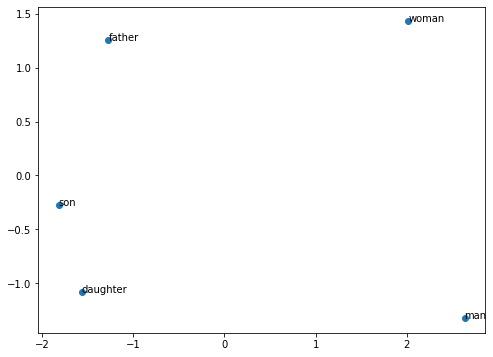

In [ ]:
word_vectors = model.wv
vocabs = ['woman','man','daughter','father','son']
word_vectors_list = [word_vectors[v] for v in vocabs]


plot_2d_graph(vocabs, word_vectors_list)

## 한국어 데이터를 활용한 Word2Vec 만들기

### 데이터 불러오기

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.8 MB/s 
     |████████████████████████████████| 448 kB 32.0 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f442dc05ad0>)

In [ ]:
train_data = pd.read_table('ratings.txt')

In [ ]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
print(len(train_data))

200000


### 데이터 전처리

In [ ]:
print(train_data.isnull().values.any())

True


In [ ]:
train_data[train_data['document'].isnull()]

,id,document,label
46471,6369843,NaN,1
60735,511097,NaN,1
77665,2172111,NaN,1
84098,402110,NaN,1
127017,5942978,NaN,0
172375,5026896,NaN,0
173526,1034280,NaN,0
197279,1034283,NaN,0


In [ ]:
train_data = train_data.dropna(how='any')
print(train_data.isnull().values.any())

False


In [ ]:
print(len(train_data))

199992


In [ ]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [ ]:
# 불용어 정의
stop_words = ['은','는','이','가','들','을','를','의','좀','잘','걍','과','도','으로','자','에','와','한','하다','도','라고']

okt = Okt()

tokenized_data = []
for sentence in train_data['document']:
    tokenized_sentence = okt.morphs(sentence, stem = True)
    stopword_remove = [word for word in tokenized_sentence if not word in stop_words]
    tokenized_data.append(stopword_remove)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### Word2vec 모델 훈련시키기

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
# 완성된 임베딩 매트릭스 크기 확인
model.wv.vectors.shape

In [ ]:
print(model.wv.most_similar('히어로'))

In [ ]:
# Word2vec 시각화
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_2d_graph(vocabs, word_vectors_list):
    
    pca = PCA(n_components = 2)
    xys = pca.fit_transform(word_vectors_list)
    xs = xys[:,0]
    ys = xys[:,1]

    plt.figure(figsize=(8 ,6))
    plt.scatter(xs, ys, marker = 'o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

In [ ]:
word_vectors = model.wv
vocabs = list(word_vectors.vocab.keys())[:15]
word_vectors_list = [word_vectors[v] for v in vocabs]


plot_2d_graph(vocabs, word_vectors_list)

# 문서 벡터(Doc2vec)을 이용한 도서 추천 알고리즘

## 모듈 & 데이터 불러오기

In [ ]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re

In [ ]:
from PIL import Image
from io import BytesIO

In [ ]:
from nltk.tokenize import RegexpTokenizer
import nltk
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/2022년도 겨울 특강-텍스트마이닝/Text_mining_5강/document_recommendation.csv')
print('total data :', len(sample))

total data : 2382


In [ ]:
sample[:5]

,Unnamed: 0,Desc,Unnamed: 0.1,author,genre,image_link,rating,title
0,0,We know that power is shifting: From West to E...,0.0,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,3,William J. Bernstein is an American financial ...,3.0,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,4,Amazing book. And I joined Steve Jobs and many...,4.0,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


## 데이터 전처리

### Ascii

 - 미국 정보교환 표준부호 
 - 영문 알파벳을 사용하는 대표적인 문자 인코딩
 - 33개의 출력 불가능한 제어 문자들과 공백을 비롯한 95개의 출력 가능한 문자들로 총 128개 구성

In [ ]:
# ascii 문자가 아닌 문자 삭제
def _removeNonAscii(s):
    return "".join(i for i in s if ord(i)<128)

# 소문자화
def make_lower(text):
    return text.lower()

# 영문 불용어 삭제
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words('english'))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# html 모양 삭제하기 
# example) <content>, </content>
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# 영어 단어 띄어쓰기 기준으로 tokenize
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    text = tokenizer.tokenize(text)
    text = ' '.join(text)
    return text

In [ ]:
sample['cleaned'] = sample['Desc'].apply(_removeNonAscii)
sample['cleaned'] = sample.cleaned.apply(make_lower)
sample['cleaned'] = sample.cleaned.apply(remove_stop_words)
sample['cleaned'] = sample.cleaned.apply(remove_punctuation)
sample['cleaned'] = sample.cleaned.apply(remove_html)

In [ ]:
# 빈 값이 있는지 확인
sample['cleaned'].replace('', np.nan, inplace=True)
nan_sample = sample[sample['cleaned'].isna()]
print('NAN값 개수:', len(nan_sample))

NAN값 개수: 1


In [ ]:
sample = sample[sample['cleaned'].notna()]

In [ ]:
#토큰화를 수행한 결과 리스트에 저장
corpus = []
for words in sample['cleaned']:
    corpus.append(words.split())

In [ ]:
urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")

('GoogleNews-vectors-negative300.bin.gz',
 <http.client.HTTPMessage at 0x7f5018fb7d90>)

In [ ]:
#구글의 사전 훈련된 Word2Vec 모델 로드
word2vec_model = Word2Vec(size= 300, window = 5, min_count =2, workers = -1)

In [ ]:
word2vec_model.build_vocab(corpus)
word2vec_model.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz', lockf=1.0, binary=True)
word2vec_model.train(corpus, total_examples = word2vec_model.corpus_count, epochs = 15)

(0, 0)

In [ ]:
# 단어 벡터의 평균을 구하기 위한 함수
def get_document_vectors(documents_list):
    document_embding_list = []
    
    for line in documents_list:
        doc2vec = None
        count = 0
        for word in line.split():
            if word in word2vec_model.wv.vocab:
                count += 1
                #해당 문서에 있는 모든 단어들의 벡터값을 더함
                if doc2vec is None:
                    doc2vec = word2vec_model[word]
                else :
                    doc2vec = doc2vec + word2vec_model[word]
                    
        if doc2vec is not None:
            #단어벡터를 모두 더한 벡터의 값을 문서의 길이로 나눠줌
            doc2vec = doc2vec / count
            document_embding_list.append(doc2vec)
            
    return document_embding_list


In [ ]:
document_embedding_list = get_document_vectors(sample['cleaned'])
print('문서 벡터 개수: ', len(document_embedding_list))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


문서 벡터 개수:  2381


## 추천 알고리즘

In [ ]:
cosine_similarities = cosine_similarity(document_embedding_list, document_embedding_list)
print('코사인 유사도 매트릭스 크기: ', cosine_similarities.shape)

코사인 유사도 매트릭스 크기:  (2381, 2381)


In [ ]:
# 선택한 책에 대한 코사인 유사도를 계산하여 가장 줄거리가 유사한(코사인 유사도가 큰) 5개의 책을 찾아내는 함수
def recommendations(title):
    books = sample[['title','image_link']]
    
    #책의 제목을 입력한 후, 해당 제목의 인덱스를 리턴받아 idx에 저장
    indices = pd.Series(sample.index, index = sample['title']).drop_duplicates()
    idx = indices[title]
    
    #입력된 책과 줄거리에 대한(document embedding) 코사인 유사도가 큰 책 5개 선정 
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores =sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6] # 가장 1에 가까운(큰) 책인 경우 자신임 따라서 [1:6]
    
    #가장 유사한 5권의 인덱스
    book_indices = [i[0] for i in sim_scores]
    
    #전체 데이터프레임에서 해당 인덱스의 행만 추출, 5개의 행만 
    recommend = books.iloc[book_indices].reset_index(drop=True)
    
    #책 표지 데이터 visualization
    fig = plt.figure(figsize=(20, 30))
    
    # 데이터 프레임으로부터 순차적으로 이미지 출력
    for index, row in recommend.iterrows():
        response = requests.get(row['image_link'])
        img = Image.open(BytesIO(response.content))
        fig.add_subplot(1,5, index+1)
        plt.imshow(img)
        plt.title(row['title'])